In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
x=df[['Price','Mileage','Cylinder']]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
model=KMeans(n_clusters=4)

In [8]:
model=model.fit(x)

In [9]:
pred=model.predict(x)

In [10]:
pred

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [11]:
x['cluster']=pred

C:\Users\behlul\AppData\Local\Temp\ipykernel_7200\3173161900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=pred


In [12]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [13]:
silhouette_score(x,pred)

0.41455890251001404

In [14]:
def clust(clusters):
    for no_of_clusters in np.arange(1,clusters):
        no_of_clusters+=1
        model=KMeans(n_clusters=no_of_clusters)
        model=model.fit()
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))

In [15]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


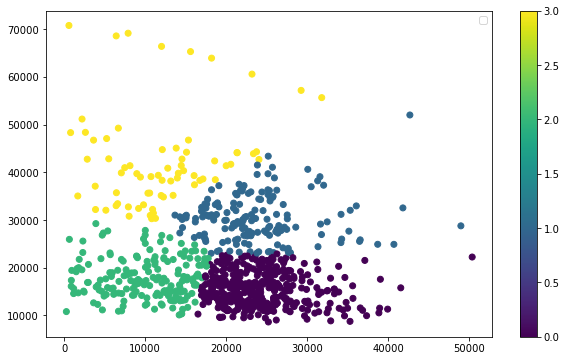

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [17]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit()
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster2,silhouette0.4517011888269287
Number of cluster3,silhouette0.412644970753732
Number of cluster4,silhouette0.41406285175055363
Number of cluster5,silhouette0.3552183388560127
Number of cluster6,silhouette0.36343615499856646
Number of cluster7,silhouette0.35882887886106685
Number of cluster8,silhouette0.3682113537359726
Number of cluster9,silhouette0.34778941037510647
Number of cluster10,silhouette0.3542279092488254


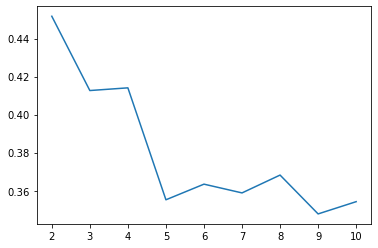

In [19]:
plt.plot(allclusters,allscore)

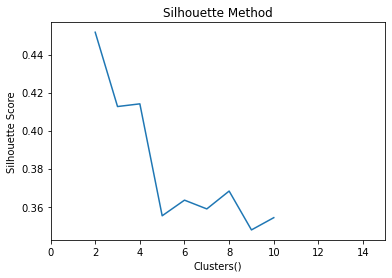

In [21]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [22]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit()
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster2,silhouette0.4517011888269287
Number of cluster3,silhouette0.41321086766467785
Number of cluster4,silhouette0.4132860981633387
Number of cluster5,silhouette0.35678250969629777
Number of cluster6,silhouette0.3586781496594514
Number of cluster7,silhouette0.3589620127969144
Number of cluster8,silhouette0.3684683410174955
Number of cluster9,silhouette0.3427756350428656


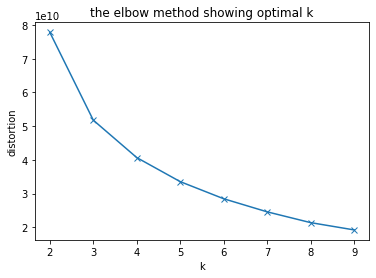

In [23]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('the elbow method showing optimal k')
plt.show()